# PRANAV V A - 18BCE0748

# ML LAB ASSIGNMENT - 4

**Train SVM classifier using sklearn digits dataset (e. from sklearn.datasets import
load_digits) and then,**

**Import Libraries**

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC 
from sklearn import datasets


**Visualize**

(1797, 64)
1797


<Figure size 432x288 with 0 Axes>

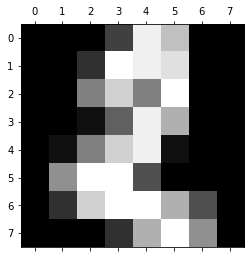

In [24]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
X_digits, y_digits = digits.data, digits.target
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[2]) 
plt.show()

**Now do some exploratory data analysis to figure out how data are linearly/non linearly
separable**

**We can use the PCA class from the sklearn.decomposition module to transform instances of 64 features to instances of two features for better vizualisation, by setting n_components to 2.**

In [27]:
n_row, n_col = 2, 5
def plot_pca_scatter():
    colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
    for i in range(len(colors)):
        px = X_pca[:, 0][y_digits == i]
        py = X_pca[:, 1][y_digits == i]
        plt.scatter(px, py, c=colors[i])
    plt.legend(digits.target_names)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')

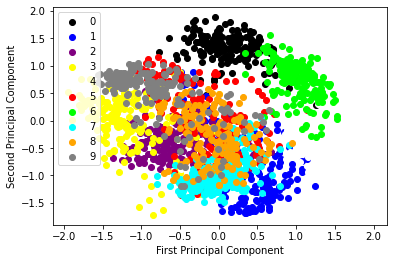

In [28]:
from sklearn.decomposition import PCA

n_components = n_row * n_col
estimator = PCA(n_components=n_components)
X_pca = estimator.fit_transform(X_digits)
plot_pca_scatter()

In [29]:
def print_pca_components(images, n_col, n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(comp.reshape((8, 8)), interpolation='nearest')
        plt.text(0, -1, str(i + 1) + '-component')
        plt.xticks(())
        plt.yticks(())

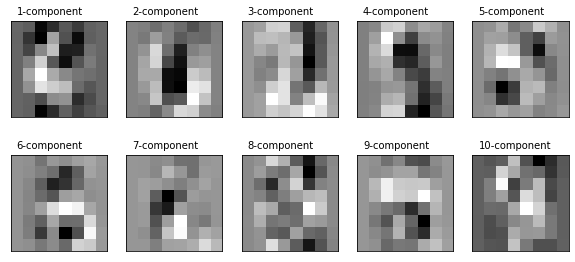

In [30]:
print_pca_components(estimator.components_[:n_components], n_col, n_row)

**Using 80% of samples as training data size**

In [6]:
X_digits, y_digits = datasets.load_digits(return_X_y=True)
X_digits = X_digits / X_digits.max() # Normalized the digits by dividing with the max value

#Splitting in to Training and Testing Datasets
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, train_size=0.2,test_size = 0.8, random_state = 101)


#linear
svm = SVC(kernel='linear', random_state=0)
print('SVM score : %f' % svm.fit(X_train,y_train).score(X_test,y_test))

SVM score : 0.961057


 **Measure accuracy of your model using different kernels such as rbf,poly and linear**

In [7]:
#rbf
svm = SVC(kernel='rbf', random_state=0)
print('SVM score : %f' % svm.fit(X_train,y_train).score(X_test,y_test))

SVM score : 0.964534


In [8]:
#poly
svm = SVC(kernel='poly', random_state=0)
print('SVM score : %f' % svm.fit(X_train,y_train).score(X_test,y_test))

SVM score : 0.969402


**Tune your model further using regularization and gamma parameters and try to come up with
highest accuracy score.**

In [11]:
scores = {}
for gamma in range(1,101):
  svm = SVC(kernel='rbf', random_state=0, gamma=gamma/10)
  score = svm.fit(X_train,y_train).score(X_test,y_test)
  scores[gamma] = score


**Best Gamma value and accuracy**

In [12]:
max_key = max(scores,key = scores.get)
print("Gamma Value: ",max_key/10,"Accuracy: ",scores[max_key])

Gamma Value:  0.4 Accuracy:  0.9770514603616134
